# Structure des méthodes pour l'app

Création du dataframe avec les matchs (1 saison) avec les shots + position (juste ce dont j'ai besoin).

Garder que les lignes et colonnes dont j'ai besoin (filtre sur le gros MEvents).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Circle, Rectangle, Arc
from ncaam.src.dao.loader import Loader

In [2]:
loader = Loader()
data = loader.import_data(["MEvents", "MConferenceTourneyGames", "MGameCities", "MNCAATourneyCompactResults",
                           "MNCAATourneyDetailedResults", "MRegularSeasonCompactResults", 
                           "MRegularSeasonDetailedResults", "MSecondaryTourneyCompactResults", "MPlayers"])

 

 

 

 

 

## Méthodes à affecter à l'app

In [3]:
MEvents = data["MEvents"]

In [4]:
# Normalize X, Y positions for court dimentions
# Court is 50 feet wide and 94 feet end to end.
MEvents['X'] = (MEvents['X'] * (94/100))
MEvents['Y'] = (MEvents['Y'] * (50/100))

In [5]:
#def plot_court() -> None:
#    pass

def plot_court(ax=None, three_line='mens', court_color='#dfbb85',lw=3, lines_color='black', lines_alpha=0.5, 
               paint_fill='blue', paint_alpha=0.4, inner_arc=False) -> None:

    if ax is None:
        ax = plt.gca()

    center_circle = Circle((94/2, 50/2), 6, linewidth=lw, color=lines_color, lw=lw, fill=False, 
                           alpha=lines_alpha)
    hoop_left = Circle((5.25, 50/2), 1.5 / 2, linewidth=lw, color=lines_color, lw=lw, fill=False, 
                       alpha=lines_alpha)
    hoop_right = Circle((94-5.25, 50/2), 1.5 / 2, linewidth=lw, color=lines_color, lw=lw, fill=False, 
                        alpha=lines_alpha)

    left_paint = Rectangle((0, (50/2)-6), 18.833333, 12, fill=paint_fill, alpha=paint_alpha, lw=lw, 
                           edgecolor=None)
    right_paint = Rectangle((94-18.83333, (50/2)-6), 18.833333, 12, fill=paint_fill, alpha=paint_alpha, lw=lw,
                            edgecolor=None)
    
    left_paint_boarder = Rectangle((0, (50/2)-6), 18.833333, 12, fill=False, alpha=lines_alpha, lw=lw, 
                                   edgecolor=lines_color)
    right_paint_boarder = Rectangle((94-18.83333, (50/2)-6), 18.833333, 12, fill=False, alpha=lines_alpha,
                            lw=lw, edgecolor=lines_color)

    left_arc = Arc((18.833333, 50/2), 12, 12, theta1=-90, theta2=90, color=lines_color, lw=lw,
                   alpha=lines_alpha)
    right_arc = Arc((94-18.833333, 50/2), 12, 12, theta1=90, theta2=-90, color=lines_color, lw=lw,
                    alpha=lines_alpha)
    
    leftblock1 = Rectangle((7, (50/2)-6-0.666), 1, 0.666, fill=True, alpha=lines_alpha, lw=0, 
                           edgecolor=lines_color, facecolor=lines_color)
    leftblock2 = Rectangle((7, (50/2)+6), 1, 0.666, fill=True, alpha=lines_alpha, lw=0, 
                           edgecolor=lines_color, facecolor=lines_color)
    ax.add_patch(leftblock1)
    ax.add_patch(leftblock2)
    
    left_l1 = Rectangle((11, (50/2)-6-0.666), 0.166, 0.666, fill=True, alpha=lines_alpha, lw=0, 
                        edgecolor=lines_color, facecolor=lines_color)
    left_l2 = Rectangle((14, (50/2)-6-0.666), 0.166, 0.666, fill=True, alpha=lines_alpha, lw=0, 
                        edgecolor=lines_color, facecolor=lines_color)
    left_l3 = Rectangle((17, (50/2)-6-0.666), 0.166, 0.666, fill=True, alpha=lines_alpha, lw=0, 
                        edgecolor=lines_color, facecolor=lines_color)
    ax.add_patch(left_l1)
    ax.add_patch(left_l2)
    ax.add_patch(left_l3)
    left_l4 = Rectangle((11, (50/2)+6), 0.166, 0.666, fill=True, alpha=lines_alpha, lw=0, 
                        edgecolor=lines_color, facecolor=lines_color)
    left_l5 = Rectangle((14, (50/2)+6), 0.166, 0.666, fill=True, alpha=lines_alpha, lw=0, 
                        edgecolor=lines_color, facecolor=lines_color)
    left_l6 = Rectangle((17, (50/2)+6), 0.166, 0.666, fill=True, alpha=lines_alpha, lw=0, 
                        edgecolor=lines_color, facecolor=lines_color)
    ax.add_patch(left_l4)
    ax.add_patch(left_l5)
    ax.add_patch(left_l6)
    
    rightblock1 = Rectangle((94-7-1, (50/2)-6-0.666), 1, 0.666, fill=True, alpha=lines_alpha, lw=0, 
                            edgecolor=lines_color, facecolor=lines_color)
    rightblock2 = Rectangle((94-7-1, (50/2)+6), 1, 0.666, fill=True, alpha=lines_alpha, lw=0, 
                            edgecolor=lines_color, facecolor=lines_color)
    ax.add_patch(rightblock1)
    ax.add_patch(rightblock2)

    right_l1 = Rectangle((94-11, (50/2)-6-0.666), 0.166, 0.666, fill=True, alpha=lines_alpha, lw=0, 
                         edgecolor=lines_color, facecolor=lines_color)
    right_l2 = Rectangle((94-14, (50/2)-6-0.666), 0.166, 0.666, fill=True, alpha=lines_alpha, lw=0, 
                         edgecolor=lines_color, facecolor=lines_color)
    right_l3 = Rectangle((94-17, (50/2)-6-0.666), 0.166, 0.666, fill=True, alpha=lines_alpha, lw=0, 
                         edgecolor=lines_color, facecolor=lines_color)
    ax.add_patch(right_l1)
    ax.add_patch(right_l2)
    ax.add_patch(right_l3)
    right_l4 = Rectangle((94-11, (50/2)+6), 0.166, 0.666, fill=True, alpha=lines_alpha, lw=0, 
                         edgecolor=lines_color, facecolor=lines_color)
    right_l5 = Rectangle((94-14, (50/2)+6), 0.166, 0.666, fill=True, alpha=lines_alpha, lw=0, 
                         edgecolor=lines_color, facecolor=lines_color)
    right_l6 = Rectangle((94-17, (50/2)+6), 0.166, 0.666, fill=True, alpha=lines_alpha, lw=0, 
                         edgecolor=lines_color, facecolor=lines_color)
    ax.add_patch(right_l4)
    ax.add_patch(right_l5)
    ax.add_patch(right_l6)
    
    if (three_line == 'mens') | (three_line == 'both'):

        three_pt_left = Arc((6.25, 50/2), 44.291, 44.291, theta1=-78, theta2=78, color=lines_color, lw=lw,
                            alpha=lines_alpha)
        three_pt_right = Arc((94-6.25, 50/2), 44.291, 44.291, theta1=180-78, theta2=180+78,
                             color=lines_color, lw=lw, alpha=lines_alpha)

        ax.plot((0, 11.25), (3.34, 3.34), color=lines_color, lw=lw, alpha=lines_alpha)
        ax.plot((0, 11.25), (50-3.34, 50-3.34), color=lines_color, lw=lw, alpha=lines_alpha)
        ax.plot((94-11.25, 94), (3.34, 3.34), color=lines_color, lw=lw, alpha=lines_alpha)
        ax.plot((94-11.25, 94), (50-3.34, 50-3.34), color=lines_color, lw=lw, alpha=lines_alpha)
        ax.add_patch(three_pt_left)
        ax.add_patch(three_pt_right)

    if (three_line == 'womens') | (three_line == 'both'):
        three_pt_left_w = Arc((6.25, 50/2), 20.75 * 2, 20.75 * 2, theta1=-85,
                              theta2=85, color=lines_color, lw=lw, alpha=lines_alpha)
        three_pt_right_w = Arc((94-6.25, 50/2), 20.75 * 2, 20.75 * 2,
                               theta1=180-85, theta2=180+85,
                               color=lines_color, lw=lw, alpha=lines_alpha)

        ax.plot((0, 8.3), (4.25, 4.25), color=lines_color, lw=lw, alpha=lines_alpha)
        ax.plot((0, 8.3), (50-4.25, 50-4.25), color=lines_color, lw=lw, alpha=lines_alpha)
        ax.plot((94-8.3, 94), (4.25, 4.25), color=lines_color, lw=lw, alpha=lines_alpha)
        ax.plot((94-8.3, 94), (50-4.25, 50-4.25), color=lines_color, lw=lw, alpha=lines_alpha)

        ax.add_patch(three_pt_left_w)
        ax.add_patch(three_pt_right_w)

    ax.add_patch(left_paint)
    ax.add_patch(left_paint_boarder)
    ax.add_patch(right_paint)
    ax.add_patch(right_paint_boarder)
    ax.add_patch(center_circle)
    ax.add_patch(hoop_left)
    ax.add_patch(hoop_right)
    ax.add_patch(left_arc)
    ax.add_patch(right_arc)
    
    if inner_arc:
        left_inner_arc = Arc((18.833333, 50/2), 12, 12, theta1=90, theta2=-90, color=lines_color, lw=lw, 
                             alpha=lines_alpha, ls='--')
        right_inner_arc = Arc((94-18.833333, 50/2), 12, 12, theta1=-90, theta2=90, color=lines_color, lw=lw,
                              alpha=lines_alpha, ls='--')
        ax.add_patch(left_inner_arc)
        ax.add_patch(right_inner_arc)

    restricted_left = Arc((6.25, 50/2), 8, 8, theta1=-90, theta2=90, color=lines_color, lw=lw, 
                          alpha=lines_alpha)
    restricted_right = Arc((94-6.25, 50/2), 8, 8, theta1=180-90, theta2=180+90, color=lines_color, lw=lw, 
                           alpha=lines_alpha)
    ax.add_patch(restricted_left)
    ax.add_patch(restricted_right)
    
    ax.plot((4, 4), ((50/2) - 3, (50/2) + 3), color=lines_color, lw=lw*1.5, alpha=lines_alpha)
    ax.plot((94-4, 94-4), ((50/2) - 3, (50/2) + 3), color=lines_color, lw=lw*1.5, alpha=lines_alpha)
    ax.plot((4, 4.6), (50/2, 50/2), color=lines_color, lw=lw, alpha=lines_alpha)
    ax.plot((94-4, 94-4.6), (50/2, 50/2), color=lines_color, lw=lw, alpha=lines_alpha)

    ax.axvline(94/2, color=lines_color, lw=lw, alpha=lines_alpha)

    boarder = Rectangle((0.3,0.3), 94-0.4, 50-0.4, fill=False, lw=3, color='black', alpha=lines_alpha)
    ax.add_patch(boarder)
    
    ax.set_xlim(0, 94)
    ax.set_ylim(0, 50)
    ax.set_facecolor(court_color)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    return ax


#fig, ax = plt.subplots(figsize=(15, 8.5))
#create_ncaa_full_court(ax, three_line='both', paint_alpha=0.4)
#plt.show()

In [6]:
MEvents.X.unique()

array([ 0.  ,  6.58,  5.64, 88.36, 85.54, 63.92, 21.62, 30.08, 27.26,
       81.78,  7.52, 83.66,  8.46, 66.74, 75.2 , 13.16, 10.34, 82.72,
       11.28, 78.02, 87.42, 20.68, 76.14,  9.4 , 28.2 , 31.96, 15.04,
       14.1 , 80.84, 71.44, 86.48, 84.6 , 45.12, 68.62, 15.98, 62.98,
       18.8 , 89.3 , 29.14, 12.22, 79.9 , 73.32, 26.32, 17.86, 65.8 ,
        4.7 , 74.26, 22.56, 25.38, 19.74, 69.56, 24.44, 62.04, 64.86,
        3.76, 67.68, 90.24, 77.08, 91.18, 72.38, 16.92, 58.28, 32.9 ,
       92.12, 61.1 , 70.5 , 23.5 , 78.96, 31.02, 60.16, 42.3 , 50.76,
       59.22,  1.88,  2.82, 44.18, 47.94, 43.24, 47.  , 93.06, 53.58,
       34.78, 33.84, 56.4 ,  0.94, 55.46, 52.64, 39.48, 38.54, 54.52,
       35.72, 37.6 , 57.34, 48.88, 36.66, 51.7 , 41.36, 40.42, 49.82,
       46.06, 94.  ])

In [7]:
def get_match(df_match: pd.DataFrame, match_name: str) -> pd.DataFrame:
    pass

In [8]:
def plot_player_shot(df_match: pd.DataFrame, player_name: str) -> None:
    pass

In [9]:
def create_match_id(team1: str, team2: str, date_match: int) -> str:
    pass

In [10]:
def create_match_id_col(df_match: pd.DataFrame) -> pd.DataFrame:
    pass

In [11]:
def plot_match_player_shot(df_match: pd.DataFrame, match_id: str, player_name: str) -> None:
    pass

## Création de la variable MatchID

In [12]:
MEvents = data["MEvents"]
# Col = EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area

MConferenceTourneyGames = data["MConferenceTourneyGames"]
# Col = Season,ConfAbbrev,DayNum,WTeamID,LTeamID

MGameCities = data["MGameCities"]
# Col = Season,DayNum,WTeamID,LTeamID,CRType,CityID

MNCAATourneyCompactResults = data["MNCAATourneyCompactResults"]
# Col = Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT

MRegularSeasonCompactResults = data["MRegularSeasonCompactResults"]
# Col = Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT

MNCAATourneyDetailedResults = data["MNCAATourneyDetailedResults"]
# Col = Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF

MRegularSeasonDetailedResults = data["MRegularSeasonDetailedResults"]
# Col = Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF

MSecondaryTourneyCompactResults = data["MSecondaryTourneyCompactResults"]
# Col = Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,SecondaryTourney


#df = MEvents.groupby(["Season", "DayNum", "WTeamID", "LTeamID"])

In [13]:
# On garde les 4 colonnes qui permettent de créer un MatchID unique et la saison 2015 pour réduire le df
# Variables utiles pour le groupby()
# df_2015 = df_2015[['Season', 'DayNum', 'WTeamID', 'LTeamID']]

# Variables utiles
df_2019 = MEvents[['Season', 'DayNum', 'WTeamID', 'LTeamID', 'EventPlayerID', 'EventType', 'X', 'Y']]

# Shots à 2 et 3 points râtés et réussis
df_2019_shots = df_2019[df_2019['EventType'].str.contains('miss2')| df_2019['EventType'].str.contains('made2')|
                  df_2019['EventType'].str.contains('made3') | df_2019['EventType'].str.contains('made3')]

# Sur une seule saison (2019)
df_2019_shots = df_2019_shots.loc[df_2019_shots['Season'] == 2019]
df_2019_shots.head()

,Season,DayNum,WTeamID,LTeamID,EventPlayerID,EventType,X,Y
10446168,2019,1,1104,1380,12013,made2,0.0,0.0
10446170,2019,1,1104,1380,148,made2,0.0,0.0
10446172,2019,1,1104,1380,164,made3,0.0,0.0
10446177,2019,1,1104,1380,164,miss2,0.0,0.0
10446181,2019,1,1104,1380,171,made2,0.0,0.0


In [14]:
# Le renseignement sur les positions de shots intervient seulement en 2019 et 2020

print(df_2019.X.unique())
print(" ")
print(df_2019_shots.X.unique())

[ 0.    6.58  5.64 88.36 85.54 63.92 21.62 30.08 27.26 81.78  7.52 83.66
  8.46 66.74 75.2  13.16 10.34 82.72 11.28 78.02 87.42 20.68 76.14  9.4
 28.2  31.96 15.04 14.1  80.84 71.44 86.48 84.6  45.12 68.62 15.98 62.98
 18.8  89.3  29.14 12.22 79.9  73.32 26.32 17.86 65.8   4.7  74.26 22.56
 25.38 19.74 69.56 24.44 62.04 64.86  3.76 67.68 90.24 77.08 91.18 72.38
 16.92 58.28 32.9  92.12 61.1  70.5  23.5  78.96 31.02 60.16 42.3  50.76
 59.22  1.88  2.82 44.18 47.94 43.24 47.   93.06 53.58 34.78 33.84 56.4
  0.94 55.46 52.64 39.48 38.54 54.52 35.72 37.6  57.34 48.88 36.66 51.7
 41.36 40.42 49.82 46.06 94.  ]
 
[ 0.    6.58 88.36 81.78  5.64 83.66  8.46 66.74 13.16  7.52 82.72 11.28
 78.02 87.42 20.68 76.14  9.4  85.54 31.96 15.04 71.44 86.48 84.6  45.12
 15.98 62.98 89.3  29.14 12.22 79.9  10.34 73.32 26.32 65.8  14.1   4.7
 25.38 74.26 24.44  3.76 18.8  77.08 69.56 72.38 80.84 16.92 17.86 90.24
 32.9  21.62 75.2  64.86 78.96 31.02 27.26 62.04 70.5  23.5  63.92 28.2
  1.88  2.82 22.56 68.

In [15]:
# DataFrame avec MatchId unique --> 5600 matchs en 2019

df_id_unique = (df_2019_shots.groupby(['Season','DayNum', 'WTeamID', 'LTeamID']).size().reset_index().rename(columns={0:'count'}))
df_id_unique['MatchID'] = df_id_unique.index
df_id_unique = df_id_unique.drop(['count'], axis=1)
df_id_unique.head()

,Season,DayNum,WTeamID,LTeamID,MatchID
0,2019,1,1104,1380,0
1,2019,1,1113,1168,1
2,2019,1,1119,1265,2
3,2019,1,1120,1375,3
4,2019,1,1123,1232,4


In [16]:
# On applique le MatchID sur l'ensemble du dataframe

df_2019_id = pd.merge(df_2019_shots, df_id_unique,  how='left', 
                      left_on=['Season','DayNum', 'WTeamID', 'LTeamID'], 
                      right_on = ['Season','DayNum', 'WTeamID', 'LTeamID'])
df_2019_id

,Season,DayNum,WTeamID,LTeamID,EventPlayerID,EventType,X,Y,MatchID
0,2019,1,1104,1380,12013,made2,0.00,0.0,0
1,2019,1,1104,1380,148,made2,0.00,0.0,0
2,2019,1,1104,1380,164,made3,0.00,0.0,0
3,2019,1,1104,1380,164,miss2,0.00,0.0,0
4,2019,1,1104,1380,171,made2,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...
481749,2019,154,1438,1403,14490,miss2,9.40,14.5,5599
481750,2019,154,1438,1403,14490,made3,4.70,3.0,5599
481751,2019,154,1438,1403,12979,miss2,88.36,23.5,5599
481752,2019,154,1438,1403,14495,made2,8.46,25.5,5599


## Récupération du nom des joueurs

In [17]:
# On utilise le df pour avoir le nom de chaque joueur en fonction de son ID pour le merge avec le df précédent
MPlayers = data["MPlayers"]
MPlayers = MPlayers[["PlayerID", "LastName", "FirstName"]]
MPlayers.head()

,PlayerID,LastName,FirstName
0,1,Albright,Christian
1,2,Cameron,Tobias
2,3,Cobb,Chase
3,4,Cooke,Austin
4,5,Crnic,Jovan


In [18]:
df_2019_id_player = pd.merge(df_2019_id, MPlayers,  how='left', left_on=['EventPlayerID'], 
                             right_on = ['PlayerID'])
df_2019_id_player

,Season,DayNum,WTeamID,LTeamID,EventPlayerID,EventType,X,Y,MatchID,PlayerID,LastName,FirstName
0,2019,1,1104,1380,12013,made2,0.00,0.0,0,12013.0,Umude,Sidney
1,2019,1,1104,1380,148,made2,0.00,0.0,0,148.0,Hall,Donta
2,2019,1,1104,1380,164,made3,0.00,0.0,0,164.0,Petty Jr.,John
3,2019,1,1104,1380,164,miss2,0.00,0.0,0,164.0,Petty Jr.,John
4,2019,1,1104,1380,171,made2,0.00,0.0,0,171.0,Smith,Galin
...,...,...,...,...,...,...,...,...,...,...,...,...
481749,2019,154,1438,1403,14490,miss2,9.40,14.5,5599,14490.0,Jerome,Ty
481750,2019,154,1438,1403,14490,made3,4.70,3.0,5599,14490.0,Jerome,Ty
481751,2019,154,1438,1403,12979,miss2,88.36,23.5,5599,12979.0,Culver,Jarrett
481752,2019,154,1438,1403,14495,made2,8.46,25.5,5599,14495.0,Key,Braxton


In [19]:
df_2019_id_player['FullName'] = df_2019_id_player['FirstName'] + " " + df_2019_id_player['LastName']
df_2019_id_player = df_2019_id_player.drop(['PlayerID', 'LastName', 'FirstName'], axis=1)
df_2019_id_player

,Season,DayNum,WTeamID,LTeamID,EventPlayerID,EventType,X,Y,MatchID,FullName
0,2019,1,1104,1380,12013,made2,0.00,0.0,0,Sidney Umude
1,2019,1,1104,1380,148,made2,0.00,0.0,0,Donta Hall
2,2019,1,1104,1380,164,made3,0.00,0.0,0,John Petty Jr.
3,2019,1,1104,1380,164,miss2,0.00,0.0,0,John Petty Jr.
4,2019,1,1104,1380,171,made2,0.00,0.0,0,Galin Smith
...,...,...,...,...,...,...,...,...,...,...
481749,2019,154,1438,1403,14490,miss2,9.40,14.5,5599,Ty Jerome
481750,2019,154,1438,1403,14490,made3,4.70,3.0,5599,Ty Jerome
481751,2019,154,1438,1403,12979,miss2,88.36,23.5,5599,Jarrett Culver
481752,2019,154,1438,1403,14495,made2,8.46,25.5,5599,Braxton Key


## Créer une fonction qui récupère les matchs joués par un joueur à partir de son nom 

In [20]:
df = df_2019_id_player.query('FullName=="Sidney Umude"')
df_col_player = df[['Season', 'EventType','X', 'Y', 'FullName', 'MatchID']]
df_col_player

,Season,EventType,X,Y,FullName,MatchID
0,2019,made2,0.0,0.0,Sidney Umude,0
14,2019,miss2,0.0,0.0,Sidney Umude,0
18,2019,made2,0.0,0.0,Sidney Umude,0
21,2019,made2,0.0,0.0,Sidney Umude,0
27,2019,miss2,0.0,0.0,Sidney Umude,0
...,...,...,...,...,...,...
447690,2019,miss2,0.0,0.0,Sidney Umude,5206
454442,2019,made2,0.0,0.0,Sidney Umude,5285
454445,2019,miss2,0.0,0.0,Sidney Umude,5285
454471,2019,miss2,0.0,0.0,Sidney Umude,5285


In [21]:
list_of_games = df_2019_id_player.query('FullName=="Sidney Umude"').get('MatchID')
print("***** All rows with the MatchID column with the selected player : *****")
print(list_of_games)

unique_games_id = set(list_of_games)
print(" ")
print("***** Unique MatchID : *****")
print(unique_games_id)

***** All rows with the MatchID column with the selected player : *****
0            0
14           0
18           0
21           0
27           0
          ... 
447690    5206
454442    5285
454445    5285
454471    5285
454474    5285
Name: MatchID, Length: 298, dtype: int64
 
***** Unique MatchID : *****
{0, 2571, 2699, 3350, 4633, 1954, 3876, 4900, 1190, 4007, 5285, 1578, 1456, 3505, 820, 186, 316, 4161, 1356, 2382, 5206, 857, 3034, 5084, 1761, 4322, 4578, 499, 3188, 2300}


In [22]:
# Create a function that select all the rows corresponding to a certain player in a dataframe

def get_games_of_a_player(name: str): #-> pd.DataFrame:
    list_of_games = df_2019_id_player.query('FullName=="name"').get('MatchID')
    return(unique_games_id)

get_games_of_a_player('Sidney Umude')

{0,
 186,
 316,
 499,
 820,
 857,
 1190,
 1356,
 1456,
 1578,
 1761,
 1954,
 2300,
 2382,
 2571,
 2699,
 3034,
 3188,
 3350,
 3505,
 3876,
 4007,
 4161,
 4322,
 4578,
 4633,
 4900,
 5084,
 5206,
 5285}

## Créer une fonction qui récupère les joueurs ayant participé à un certain match

In [ ]:
df2 = df_2019_id_player.query('MatchID=="1234"')
df_col_match = df2[['EventType', 'X', 'Y', 'MatchID', 'FullName']]
df_col_match

In [ ]:
list_of_players = df_2019_id_player.query('MatchID=="1234"').get('FullName')
print("********** All rows with the Name of the player participating to the selected game : **********")
print(list_of_players)


unique_players = set(list_of_players)
print(" ")
print("********** Unique FullName : **********")
print(unique_players)

In [ ]:
def get_players_of_a_game(matchID: int): #-> pd.DataFrame:
    list_of_players = df_2019_id_player.query('MatchID=="matchID"').get('FullName')
    return(unique_players)

get_players_of_a_game(1086)

## Créer une fonction qui récupère le nom de tous les joueurs de la saison

In [ ]:
all_players = df_2019_id_player.get('FullName')
print("********** All rows with the Name of the player participating to the selected season : **********")
print(all_players)


unique_players_season = set(all_players)
print(" ")
print("********** Unique FullName : **********")
print(unique_players_season)

In [ ]:
def get_players_of_a_season(season: int):
    all_players = MEvents.query('Season=="season"').get('FullName')
    unique_players_season
    return unique_players_season

In [ ]:
#Soucis avec des NaN --> à voir !
get_players_of_a_season(2018)

## Créer une fonction qui plot les tirs de chaque joueur

In [ ]:
def plot_shot_player(name: str): #-> None
    ms = 10 # Marker Size
    FullName = 'name'
    fig, ax = plt.subplots(figsize=(15, 8))
    ax = plot_court(ax)

    df_2019_id_player.query('FullName == @name and EventType == "made2"') \
        .plot(x='X', y='Y', style='o', title='Shots (Sidney Umude)', alpha=0.5,figsize=(15, 8), 
              label='Made 2', ms=ms,ax=ax)
    plt.legend()

    df_2019_id_player.query('FullName == @name and EventType == "miss2"') \
        .plot(x='X', y='Y', style='X', alpha=0.5, ax=ax, label='Missed 2', ms=ms)
    plt.legend()

    df_2019_id_player.query('FullName == @name and EventType == "made3"') \
        .plot(x='X', y='Y', style='o', c='green', alpha=0.5, figsize=(15, 8), label='Made 3', ax=ax, ms=ms)
    plt.legend()

    df_2019_id_player.query('FullName == @name and EventType == "miss3"') \
        .plot(x='X', y='Y', style='X', c='brown', alpha=0.5, ax=ax, label='Missed 3', ms=ms)

    ax.set_xlabel('')
    plt.legend()
    plt.show()

In [ ]:
plot_shot_player('Sidney Umude')

In [23]:
df2 = df_2019_id_player.query('MatchID=="1234"')
df_col_match = df2[['EventType', 'X', 'Y', 'MatchID', 'FullName']]
df_col_match

,EventType,X,Y,MatchID,FullName
107423,miss2,0.0,0.0,1234,Payten Ricks
107424,made2,0.0,0.0,1234,Cory Gensler
107425,miss2,0.0,0.0,1234,Jalone Friday
107426,miss2,0.0,0.0,1234,Isaac Chatman
107427,made3,0.0,0.0,1234,Payten Ricks
...,...,...,...,...,...
107493,made2,0.0,0.0,1234,Jaren Lewis
107494,miss2,0.0,0.0,1234,Ja'Cor Nelson
107495,made2,0.0,0.0,1234,Chris Clemons
107496,made3,0.0,0.0,1234,Jalone Friday


In [24]:
list_of_players = df_2019_id_player.query('MatchID=="1234"').get('FullName')
print("********** All rows with the Name of the player participating to the selected game : **********")
print(list_of_players)


unique_players = set(list_of_players)
print(" ")
print("********** Unique FullName : **********")
print(unique_players)

********** All rows with the Name of the player participating to the selected game : **********
107423     Payten Ricks
107424     Cory Gensler
107425    Jalone Friday
107426    Isaac Chatman
107427     Payten Ricks
              ...      
107493      Jaren Lewis
107494    Ja'Cor Nelson
107495    Chris Clemons
107496    Jalone Friday
107497    Chris Clemons
Name: FullName, Length: 75, dtype: object
 
********** Unique FullName : **********
{'Hayden Farquhar', 'Cory Gensler', 'Payten Ricks', 'Jaylen Franklin', 'Jaren Lewis', 'Trey Spencer', 'Jalone Friday', 'Brooks Cluxton', 'Andrew Eudy', 'Damien Daniels', 'Isaac Chatman', 'Joe Pleasant', 'Jordan Whitfield', 'Trey Lenox', 'Chris Clemons', "Ja'Cor Nelson"}


In [25]:
def get_players_of_a_game(matchID: int): #-> pd.DataFrame:
    list_of_players = df_2019_id_player.query('MatchID=="matchID"').get('FullName')
    return(unique_players)

get_players_of_a_game(1086)

{'Andrew Eudy',
 'Brooks Cluxton',
 'Chris Clemons',
 'Cory Gensler',
 'Damien Daniels',
 'Hayden Farquhar',
 'Isaac Chatman',
 "Ja'Cor Nelson",
 'Jalone Friday',
 'Jaren Lewis',
 'Jaylen Franklin',
 'Joe Pleasant',
 'Jordan Whitfield',
 'Payten Ricks',
 'Trey Lenox',
 'Trey Spencer'}

## Créer une fonction qui récupère le nom de tous les joueurs de la saison

In [26]:
all_players = df_2019_id_player.get('FullName')
print("********** All rows with the Name of the player participating to the selected season : **********")
print(all_players)


unique_players_season = set(all_players)
print(" ")
print("********** Unique FullName : **********")
print(unique_players_season)

********** All rows with the Name of the player participating to the selected season : **********
0            Sidney Umude
1              Donta Hall
2         John Petty Jr. 
3         John Petty Jr. 
4             Galin Smith
               ...       
481749          Ty Jerome
481750          Ty Jerome
481751     Jarrett Culver
481752        Braxton Key
481753    De'Andre Hunter
Name: FullName, Length: 481754, dtype: object
 
********** Unique FullName : **********
{nan, nan, 'Stephen Edoka', nan, nan, 'TJ Gray', 'Nysier Brooks', nan, nan, 'Josh Rosario', 'Kimani Lawrence', 'Tres Tinkle', 'Nate Pierre-Louis', 'Shaquille Walters', 'Matthew Moyer', 'New Williams', 'AJ Farrar', 'Josh Ferguson', 'Ricky Lindo Jr.', 'Jacob Orender', 'Josh Caldwell', 'Matt Dentlinger', 'Hayden Miller', 'Logan Johnson', 'Sam Iorio', 'Kellon Taylor', 'Cameron Delaney', 'Tyson Smith', 'Cameron Carmical', 'Jordan Ford', 'Derrick Alston', 'Ryan Woolridge', 'Jarron Cumberland', 'Taevion Kinsey', 'Kira Lewis Jr. '

In [27]:
def get_players_of_a_season(season: int):
    all_players = MEvents.query('Season=="season"').get('FullName')
    unique_players_season
    return unique_players_season

In [28]:
#Soucis avec des NaN --> à voir !
get_players_of_a_season(2018)

/Users/nicolasrousseau/pycharm_projects/ncaam-2020/venv/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


{nan,
 nan,
 'Stephen Edoka',
 nan,
 nan,
 'TJ Gray',
 'Nysier Brooks',
 nan,
 nan,
 'Josh Rosario',
 'Kimani Lawrence',
 'Tres Tinkle',
 'Nate Pierre-Louis',
 'Shaquille Walters',
 'Matthew Moyer',
 'New Williams',
 'AJ Farrar',
 'Josh Ferguson',
 'Ricky Lindo Jr.',
 'Jacob Orender',
 'Josh Caldwell',
 'Matt Dentlinger',
 'Hayden Miller',
 'Logan Johnson',
 'Sam Iorio',
 'Kellon Taylor',
 'Cameron Delaney',
 'Tyson Smith',
 'Cameron Carmical',
 'Jordan Ford',
 'Derrick Alston',
 'Ryan Woolridge',
 'Jarron Cumberland',
 'Taevion Kinsey',
 'Kira Lewis Jr. ',
 'Bolden Brace',
 'Jakigh Dottin',
 'Travon Mayo',
 'Romani Hansen',
 'Ivan Madunic',
 'Antonio Vrankovic',
 'Marcus DeBerry',
 'Keyon Jones',
 'Tahj Eaddy',
 'Aleksandar Dozic',
 'Isaiah Washington',
 'Elijah Minnie',
 'Seneca  Knight',
 'Aaron Wiggins',
 'Makai Ashton-Langford',
 'Derek Culver',
 'Rayshawn Miller',
 'Kassoum Yakwe',
 'Jaylen McManus',
 'Anderson McCoy',
 'Arnaldo Toro',
 'Jaylen Nowell',
 'Matthew Herasme',
 'Cale

## Créer une fonction qui plot les tirs de chaque joueur

In [29]:
def plot_shot_player(name: str): #-> None
    ms = 10 # Marker Size
    FullName = 'name'
    fig, ax = plt.subplots(figsize=(15, 8))
    ax = plot_court(ax)

    df_2019_id_player.query('FullName == @name and EventType == "made2"') \
        .plot(x='X', y='Y', style='o', title='Shots (Sidney Umude)', alpha=0.5,figsize=(15, 8), 
              label='Made 2', ms=ms,ax=ax)
    plt.legend()

    df_2019_id_player.query('FullName == @name and EventType == "miss2"') \
        .plot(x='X', y='Y', style='X', alpha=0.5, ax=ax, label='Missed 2', ms=ms)
    plt.legend()

    df_2019_id_player.query('FullName == @name and EventType == "made3"') \
        .plot(x='X', y='Y', style='o', c='green', alpha=0.5, figsize=(15, 8), label='Made 3', ax=ax, ms=ms)
    plt.legend()

    df_2019_id_player.query('FullName == @name and EventType == "miss3"') \
        .plot(x='X', y='Y', style='X', c='brown', alpha=0.5, ax=ax, label='Missed 3', ms=ms)

    ax.set_xlabel('')
    plt.legend()
    plt.show()

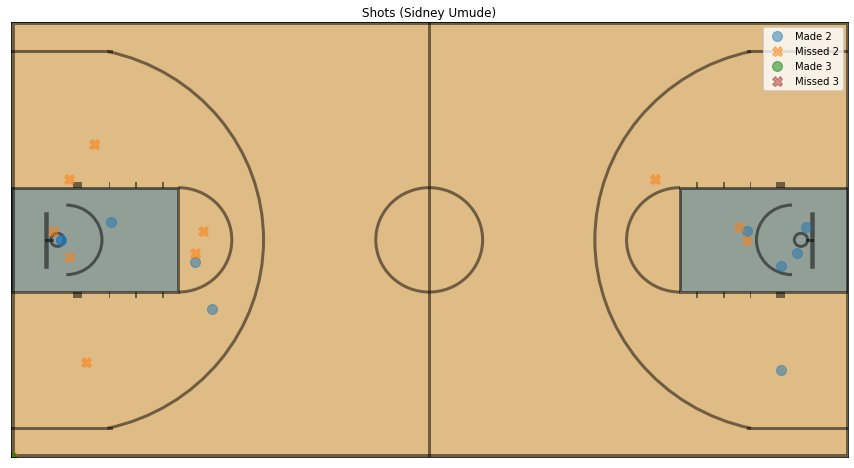

In [30]:
plot_shot_player('Sidney Umude')